<a href="https://colab.research.google.com/github/jdesous1/MVP-Sprint-1/blob/main/MVP_PUC_RIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP PUC RIO: Predição da Quantidade de Alunos a Serem Matriculados em uma Universidade com Base em Dados Históricos

# MVP de Predição da Quantidade de Alunos a Serem Matriculados em uma Universidade com Base em Dados Históricos

## Josafá de Sousa Gomes Júnior

## 1. Definição do Problema


Os dados selecionados (a partir do primeiro semestre de 2014 até o segundo semestre de 2022) para realização da respectiva análise referem-se a um conjunto histórico dos alunos matriculados em uma Instituição de Ensino Superior. Cada linha do dataset fornecido trata-se de um semestre e sua respectiva quantidade de alunos matriculados (**Atributos: Semestre** - Período do ano em que o aluno está matrículado na Universidade  e **IngressosVestibular** - Total de alunos que entraram na Universidade no respectivo período).

A razão pela qual houve esse preocupação está pautada em proporcionar uma melhor experiência ao aluno como melhoria da quantidade de professor por turma (a Universidade possui um padrão de quantidade de docentes por turma), otimização da oferta de disciplinas, enxergar o comportamento para identificar se há padrões, estabelecer planos de ação, reduzir custos, dentre outros. 
Link do dataset escolhido no github: https://raw.githubusercontent.com/jdesous1/MVP-Sprint-1/main/IngressoMatriculados.csv

In [42]:
# As bibliotecas abaixo foram as importadas para modelagem dos dados e realização de análise dos mesmos

import pandas as pd # utilizada para limpeza, tratamento de dados e análise exploratória de dados
import numpy as np # útil para executar várias tarefas matemáticas como integração numérica, diferenciação, interpolação, extrapolação e etc
import matplotlib # serve para visualização de dados e plotagem gráfica
import matplotlib.pyplot as plt # contém várias funções para criação de gráficos
import seaborn as sns # fornece uma interface de alto nível para criação de gráficos estatísticos atraentes e informativos
import missingno as ms # serve para tratamento de missings
from matplotlib import cm # o "cm" representa "colormap" ou mapa de cores para serem usados em um gráfico
from pandas import set_option # é uma função da biblioteca pandas que permite definir opções globais para a exibição de dados em um DataFrame.
from pandas.plotting import scatter_matrix # permite criar uma matriz de gráficos de dispersão a partir de um DataFrame. 
from sklearn.preprocessing import StandardScaler #  é uma ferramenta da biblioteca Scikit-learn (sklearn) que permite padronizar um conjunto de dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

A partir do arquivo disponibilizado acima, iremos iniciar algumas análises e visualizações das informações do dataset escolhido afim de explorá-lo e extrair informações suficientemente relevantes.

Para este escopo inicial será utilizado o pacote Pandas para exibição do conjunto de linhas iniciais do dataset escolhido

In [44]:
# Neste cenário o arquivo csv será importado usando o pacote Pandas através de uma URL

# Declaração da URL na qual os dados serão importados
url = "https://raw.githubusercontent.com/jdesous1/MVP-Sprint-1/main/IngressoMatriculados.csv"

# Iremos agora definir o nome da coluna na qual os dados serão atribuídos
coluna = ['semest','hist']

# Conforme descrito na definição do problema, o período de coleta vai de 2014 à 2022, dessa forma a estrutura ocorrerá conforme segue
dados = pd.read_csv(url, names=coluna, skiprows=1, delimiter=',')

# O objetivo agora é analisar se a estrutura dos dados está de acordo com o que foi definido no passo acima, estruturando a coluna com seu nome e os respectivos valores


In [45]:
# Com o uso do código dados.head() será possível ter a visão das 5 primeiras linhas do dataframe
dados.head()
# Para a coluna semest parametrizamos que o semestre inicial seria o de número 1 e assim sucessivamente até o preenchimento de todas as informações do dataset.

,semest,hist
0,1,3145
1,2,2458
2,3,3014
3,4,1896
4,5,2532


In [46]:
# Com o uso do código dados.tail() será possível ter a visão das últimas 5 linhas do dataframe

In [47]:
dados.tail()

,semest,hist
13,14,815
14,15,2285
15,16,1491
16,17,2829
17,18,1476


## 3. Análise de dados

Definida a estrutura do dataset iremos agora realizar inferências sobre o mesmo buscando extrair o máximo de informações dos dados utilizandos os recursos diponibilizados pelas bibliotecas

### 3.1. Dimensão dos dados

Nesta etapa será analisada informações relativas ao dataset como atributos, classe, distribuição dos dados e a variabilidade dos valores.


In [48]:
# Análise dos atributos de dados
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   semest  18 non-null     int64
 1   hist    18 non-null     int64
dtypes: int64(2)
memory usage: 416.0 bytes
None


A partir do processamento realizado acima concluímos que nosso dataset não possui valores nulos e todos são do tipo inteiro, além disso, como já estabelecido, vemos o nome das duas colunas definidas (semest e hist)

In [49]:
# Análise da dimensão do dataset
print(dados.shape)

(18, 2)


O resultado acima reforça a análise já realizada, em que observarmos 18 linhas e 2 colunas, ou seja, uma matriz 18 por 2

In [50]:
# Para conhecer as estatísticas inerentes ao conjunto de dados, mais especificamente, as informações relativas à quantidade de alunos durante todo o período tem-se
estatistica = print(round(dados['hist'].describe(), 2))
 


count      18.00
mean     2067.61
std       713.37
min       815.00
25%      1479.75
50%      2362.00
75%      2520.75
max      3145.00
Name: hist, dtype: float64


Nesta análise inicial consideramos 2 casas decimais, porém para efeitos de quantidade de matrícula será interessante deixar sem nenhuma já que estamos tratando de número de inscrições, dessa forma, os tipos de número deixarão de ser decimais


In [51]:
# Rodando novamente o código agora desconsiderando as casas decimais
print(dados['hist'].describe().apply(lambda x: format(x, '.0f')))

count      18
mean     2068
std       713
min       815
25%      1480
50%      2362
75%      2521
max      3145
Name: hist, dtype: object


De posse das informações acima nota-se uma grande diferença entre o valor máximo e mínimo, uma média de 2068 alunos matrículados por semestre e desvio padrão de 713 alunos

Agora o dataset será expandido mostrando todos os seus atributos da linha inicial até a final


In [52]:
# Exibição das informações a partir da variável que foi denominada de dados
print(dados)

    semest  hist
0        1  3145
1        2  2458
2        3  3014
3        4  1896
4        5  2532
5        6  1656
6        7  2652
7        8  1246
8        9  2487
9       10  1209
10      11  2439
11      12  1111
12      13  2476
13      14   815
14      15  2285
15      16  1491
16      17  2829
17      18  1476


### 3.2. Visualizações Unimodais

Visualizações unimodais se referem a uma distribuição unimodal de dados em uma visualização gráfica, ou seja, uma distribuição que tem apenas um pico, uma única moda. Essa visualização pode ser feita por meio de um histograma, um gráfico de densidade, um boxplot ou qualquer outra técnica que represente uma distribuição unidimensional de dados


Abaixo está demonstrada a **Visualização Gráfica** dos dados junto de sua linha de tendência. Para este caso em específico está sendo arbitrado um polinômio de grau 8 para tentarmos fazer com que a previsão reflita o máximo possível a realidade


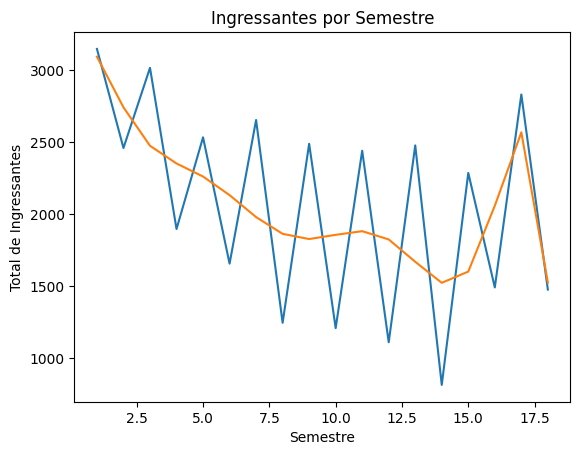

In [53]:
# Lê o arquivo CSV com os dados
df = pd.read_csv('https://raw.githubusercontent.com/jdesous1/MVP-Sprint-1/main/IngressoMatriculados.csv')

# Define as colunas 'Ano' e 'Total de Matriculados' como os dados para o gráfico
x = df['Semestre'] 
y = df['IngressosVestibular']

# Cria o gráfico de linhas
plt.plot(x, y)

# Adiciona rótulos aos eixos
plt.xlabel('Semestre')
plt.ylabel('Total de Ingressantes')
plt.title('Ingressantes por Semestre')

# Adicionando uma linha de tendência no gráfico
z = np.polyfit(x, y, 8)
p = np.poly1d(z)
plt.plot(x, p(x), "-")


# mostra o gráfico
plt.show()

A partir do gráfico acima, é possível observar um perfil de comportamento de ingressantes por semestre. Nos picos, ou seja, nos semestres ímpares ou que são conhecidos no meio educacional como 2014.1, 2015.1, 2016.1, 2017.1 e assim sucessivamente, há uma tendência de maior quantidade de ingressantes, o que não ocorre nos vales, e todos correspondem a semestres pares, ou seja, 2014.2, 
2015.2 e 2016.2

Dessa forma, fica clara a diferença de movimentação de ingressantes em cada tipo de semestre

Agora será apresentada o **Histograma** dos dataset. Ele é útil para entender como os dados estão distribuídos em relação a um intervalo de valores. O histograma divide os dados em intervalos chamados de "bins" e mostra quantas observações estão dentro de cada bin.

Conforme mostrado no código, a distribuição dos dados é assimétrica

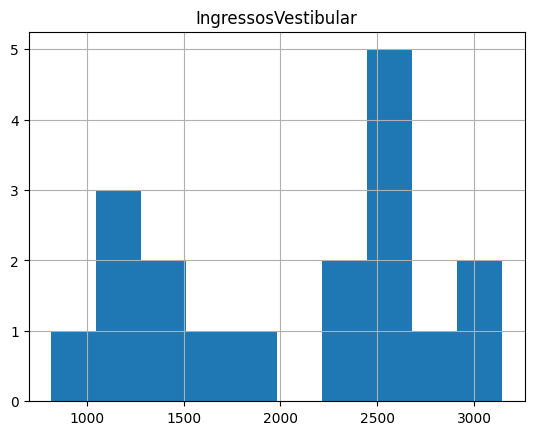

In [54]:
# Histograma do Total de Ingressantes
df = pd.read_csv(url)
df.hist(column='IngressosVestibular')
plt.show()

O gráfico de densidade é útil para identificar características importantes dos dados, como a forma da distribuição, a presença de valores atípicos (outliers) e a localização dos valores centrais. Ele é especialmente útil quando se deseja comparar a distribuição de duas ou mais variáveis

Agora será gerado um gráfico de densidade para a coluna analisada


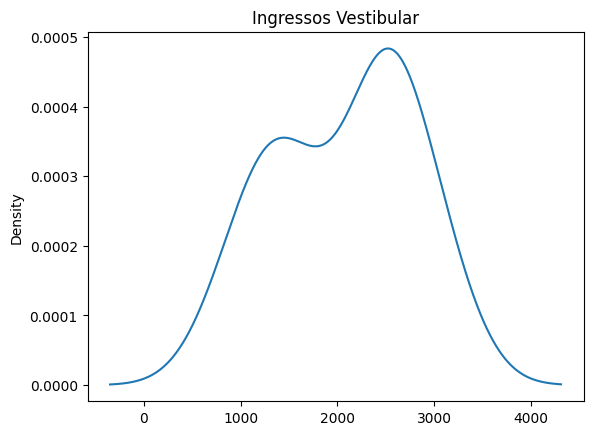

In [55]:
# Density Plot
df['IngressosVestibular'].plot(kind='density')
plt.title("Ingressos Vestibular")
plt.show()

Para a função Boxplot utilizamos a função plt.boxplot() do matplotlib para gerar o boxplot para a coluna "hist" do dataset "IngressoMatriculados.csv". Também adicionamos um título ao gráfico com plt.title() e definimos o rótulo do eixo y com plt.ylabel().

O gráfico de boxplot apresenta diversas informações sobre a distribuição dos dados. A caixa do gráfico representa o intervalo entre o primeiro e terceiro quartis (ou Q1 e Q3), onde a mediana (ou Q2) é representada pela linha dentro da caixa. Os limites da caixa representam o intervalo interquartil (IQR), calculado pela diferença entre Q3 e Q1. Os pontos que ficam fora dos limites da caixa, chamados de outliers, são representados por bolinhas e indicam valores extremos.

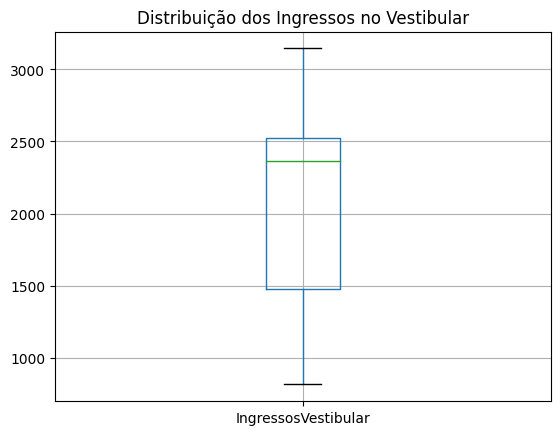

In [60]:
#Boxplot
coluna = "IngressosVestibular"
df.boxplot(column=coluna)
plt.title("Distribuição dos Ingressos no Vestibular")
plt.show()

Portanto, existem alguns valores discrepantes (outliers) acima de 3000 ingressantes, indicando um número elevado de ingressos por vestibular.